### Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

### Import Data

In [3]:
data = pd.read_csv('survey.csv')

### Description of Columns in Data

**state**: If you live in the United States, which state or territory do you live in? <br>
**self_employed:** Are you self-employed? <br>
**family_history:** Do you have a family history of mental illness? <br>
**treatment:** Have you sought treatment for a mental health condition? <br>
**work_interfere:** If you have a mental health condition, do you feel that it interferes with your work? <br>
**no_employees:** How many employees does your company or organization have? <br>
**remote_work:** Do you work remotely (outside of an office) at least 50% of the time? <br>
**tech_company:** Is your employer primarily a tech company/organization? <br>
**benefits:** Does your employer provide mental health benefits?<br>
**care_options:** Do you know the options for mental health care your employer provides?<br>
**wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?<br>
**seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?<br>
**anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?<br>
**leave:** How easy is it for you to take medical leave for a mental health condition? <br>
**mental_health_consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences? <br>
**phys_health_consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences? <br>
**coworkers:** Would you be willing to discuss a mental health issue with your coworkers? <br>
**supervimsor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)? <br>
**mental_health_interview:** Would you bring up a mental health issue with a potential employer in an interview? <br>
**phys_health_interview:** Would you bring up a physical health issue with a potential employer in an interview? <br>
**mental_vs_physical:** Do you feel that your employer takes mental health as seriously as physical health? <br>
**obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?<br>
**comments:** Any additional notes or comments

### Questions

1. What percentage of tech companies offer mental health benefits?
2. How do tech companies compare with non-tech? 
3. What are the most common features of mental health benefits programs?
4. Do better mental health benefits programs create better mental health environments in companies? 

In [4]:
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### How effective are corporate mental health schemes?

In [5]:
# how do tech and non-tech companies compare in the percentage of them that offer mental health programmes?

In [6]:
#this filters the data by the columns specified, and if the company is a tech company.
tech_companies = data[['treatment','work_interfere','tech_company','benefits','no_employees']]
tech_companies = tech_companies.loc[tech_companies['tech_company'] == 'Yes']
tech_companies.head()

,treatment,work_interfere,tech_company,benefits,no_employees
0,Yes,Often,Yes,Yes,6-25
2,No,Rarely,Yes,No,6-25
3,Yes,Often,Yes,No,26-100
4,No,Never,Yes,Yes,100-500
5,No,Sometimes,Yes,Yes,6-25


In [7]:
tech_companies['benefits'].value_counts()

Yes           373
Don't know    335
No            323
Name: benefits, dtype: int64

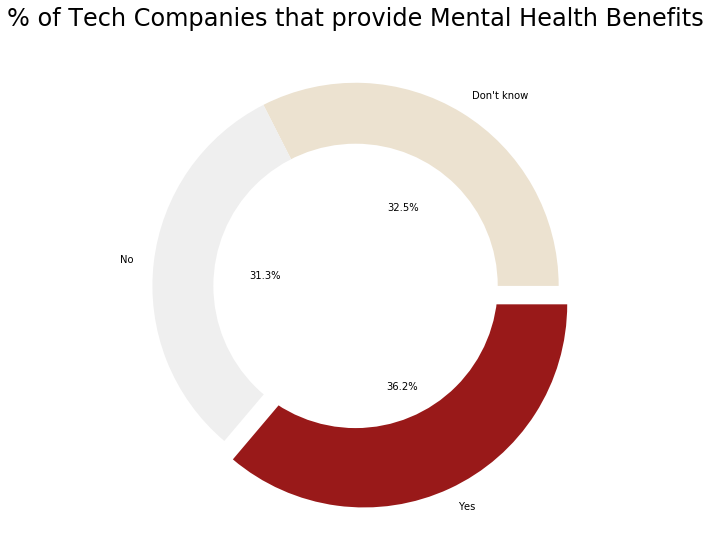

In [8]:
# this creates a donut chart show the percentage of tech companies that provide mental health benefits
ds = tech_companies.groupby(['benefits'], as_index=False).agg(['count'])
ds['tech_company']
pie = ds.plot.pie(x='Months_encoded',y='tech_company',
            explode = (0, 0, 0.1), 
                
                pctdistance=0.45,
                autopct='%1.1f%%',colors = ('#ECE2D0','#efefef','#991919'), figsize=(24, 8))
centre_circle = plt.Circle((0,0),0.70,fc='white') #this makes the donut
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rcParams.update({'font.size': 20})
plt.title("% of Tech Companies that provide Mental Health Benefits")
pie.get_legend().remove()
plt.ylabel('')
plt.tight_layout()
plt.show()

In [9]:
# this filters the data by the columns specified, and if the company is non-tech.
non_tech_companies = data[['treatment','work_interfere','tech_company','benefits','no_employees']]
non_tech_companies = non_tech_companies.loc[non_tech_companies['tech_company'] == 'No']
non_tech_companies.head()

,treatment,work_interfere,tech_company,benefits,no_employees
1,No,Rarely,No,Don't know,More than 1000
12,Yes,Sometimes,No,Yes,26-100
23,Yes,Never,No,Don't know,More than 1000
25,Yes,Sometimes,No,Yes,More than 1000
58,No,NaN,No,No,26-100


In [10]:
non_tech_companies['benefits'].value_counts()

Yes           104
Don't know     73
No             51
Name: benefits, dtype: int64

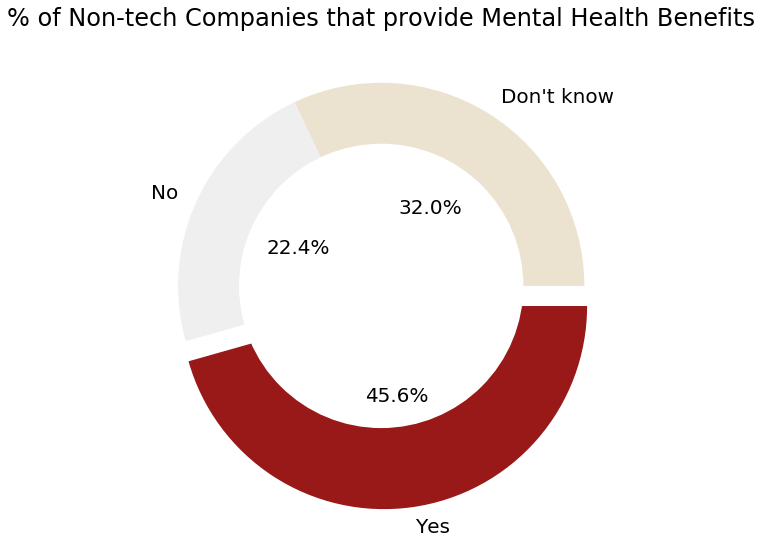

In [11]:
# this creates a donut chart show the percentage of non-tech companies that provide mental health benefits
ds_non = non_tech_companies.groupby(['benefits'], as_index=False).agg(['count'])

pie = ds_non.plot.pie(x='Months_encoded',y='tech_company', 
                explode = (0, 0, 0.1), 
                
                pctdistance=0.45,
                autopct='%1.1f%%',colors = ('#ECE2D0','#efefef','#991919'), figsize=(24, 8))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
pie.get_legend().remove()
plt.title("% of Non-tech Companies that provide Mental Health Benefits")
plt.ylabel('')
plt.tight_layout()
plt.show()

In [12]:
# does that change regardless of the size of the company?

In [29]:
# this filter data by companies providing mental health benefits, and those that don't 
benefits_companies = data.loc[data['benefits'] == 'Yes']
benefits_companies[['benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence',
                   'coworkers','supervisor']].head(10)
benefits_companies.shape

(477, 28)

In [15]:
# this prints the values for each option, it acts as a sense check to verify the below data.
print("Provides care options:\n",benefits_companies['care_options'].value_counts())
print("Mental health part of wellness program:\n",benefits_companies['wellness_program'].value_counts())
print("Provides resources on where to get help:\n",benefits_companies['seek_help'].value_counts())
print("Anonymity:\n",benefits_companies['anonymity'].value_counts())
print("Leave:\n",benefits_companies['leave'].value_counts())

Provides care options:
 Yes         293
No           92
Not sure     92
Name: care_options, dtype: int64
Mental health part of wellness program:
 No            222
Yes           184
Don't know     71
Name: wellness_program, dtype: int64
Provides resources on where to get help:
 Yes           205
No            145
Don't know    127
Name: seek_help, dtype: int64
Anonymity:
 Don't know    242
Yes           228
No              7
Name: anonymity, dtype: int64
Leave:
 Don't know            223
Somewhat easy         108
Very easy              86
Somewhat difficult     39
Very difficult         21
Name: leave, dtype: int64


In [16]:
# This builds the employer mental health benefits program metrics.
# NOTE: the leave metric was not "Yes/No/Maybe", it took five answer options. 
# To synchronize the metrics, the two positive answers aree merged, and the two negative answers are merged.
care = benefits_companies['care_options'].value_counts().values.tolist()
well = benefits_companies['wellness_program'].value_counts().values.tolist()
well[0],well[1],well[2] = well[1],well[2],well[0]
seek = benefits_companies['seek_help'].value_counts().values.tolist()
seek[0],seek[1],seek[2] = seek[0],seek[2],seek[1]
anon = benefits_companies['anonymity'].value_counts().values.tolist()
anon[0],anon[1],anon[2] = anon[1],anon[0],anon[2]
leave= benefits_companies['leave'].value_counts().values.tolist()
leave[0],leave[1],leave[2],leave[3],leave[4] = leave[2],leave[1],leave[0],leave[3],leave[4]
leave[0] = leave[0]+leave[1]
leave[3] = leave[3]+leave[4]
leave = [leave[0],leave[2],leave[3]]
Yes = [care[0],well[0],seek[0],anon[0],leave[0]]
Dontknow = [care[1],well[1],seek[1],anon[1],leave[1]]
No = [care[2],well[2],seek[2],anon[2],leave[2]]
variable = ['knowledge','discussed','resources','anonymity','medical leave']
final = pd.DataFrame(list(zip(variable,Yes, Dontknow,No)), 
               columns =['Metric','Yes', "Don't Know",'No'])
final

,Metric,Yes,Don't Know,No
0,knowledge,293,92,92
1,discussed,184,71,222
2,resources,205,127,145
3,anonymity,228,242,7
4,medical leave,194,223,60


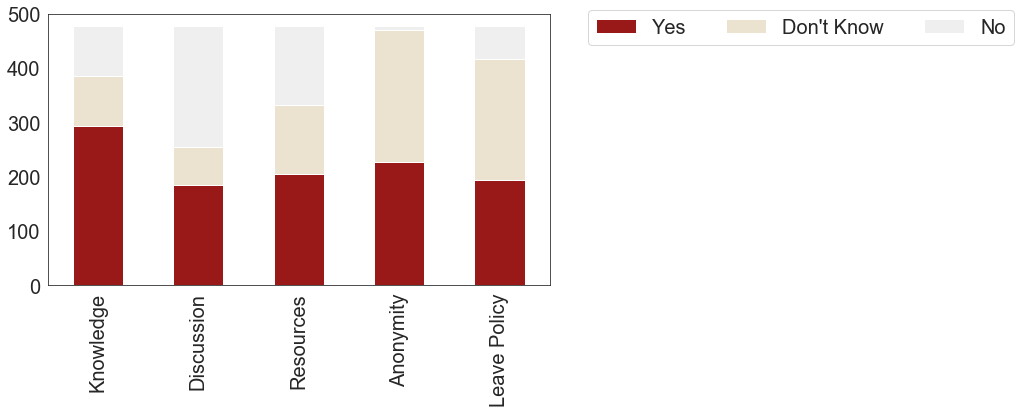

In [30]:

labels = ['Knowledge','Discussion','Resources','Anonymity','Leave Policy']
x_pos = [i for i, _ in enumerate(labels)]
bar = final.plot(kind='bar', stacked=True,color = ('#991919','#ECE2D0','#efefef'))
plt.xticks(x_pos,labels)
bar.legend(loc='upper center', bbox_to_anchor=(1.5, 1.05),
          ncol=3, fancybox=True) 
fig = plt.gcf()
fig.set_size_inches(9, 5)

In [31]:
# This creates the mental health program score by assigning the value "1" to "Yes" for each metric.
data = pd.read_csv('survey.csv')
data['care_options'] = (data['care_options'] == 'Yes').astype(int)
data['wellness_program'] = (data['wellness_program'] == 'Yes').astype(int)
data['seek_help'] = (data['seek_help'] == 'Yes').astype(int)
data['anonymity'] = (data['anonymity'] == 'Yes').astype(int)
data['leave'] = (data['leave'] == 'Yes').astype(int)

prog_score = data[['care_options','wellness_program',
      'seek_help','anonymity','leave']]
prog_score['prog_score'] = prog_score.sum(axis=1)
prog_score.sort_values(by=['prog_score'], ascending=False).head(10)
prog_score.head()

C:\Users\lukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,care_options,wellness_program,seek_help,anonymity,leave,prog_score
0,0,0,1,1,0,2
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,1
4,0,0,0,0,0,0


In [20]:
# This creates the mental health program score by assigning the value "1" to to either Yes or No, depending on which
# accurately descrives a positive mental health environment. 
data = pd.read_csv('survey.csv')
data['mental_health_consequence'] = (data['mental_health_consequence'] == 'No').astype(int)
data['phys_health_consequence'] = (data['phys_health_consequence'] == 'No').astype(int)
data['coworkers'] = (data['coworkers'] == 'Yes').astype(int)
data['mental_vs_physical'] = (data['anonymity'] == 'Yes').astype(int)
data['obv_consequence'] = (data['leave'] == 'No').astype(int)

env_score = data[['mental_health_consequence','phys_health_consequence',
      'coworkers','mental_vs_physical','obv_consequence']]
env_score['env_score'] = env_score.sum(axis=1)
env_score.sort_values(by=['env_score'], ascending=False).head()
env_score.head()

C:\Users\lukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,mental_health_consequence,phys_health_consequence,coworkers,mental_vs_physical,obv_consequence,env_score
0,1,1,0,1,0,3
1,0,1,0,0,0,1
2,1,1,1,0,0,3
3,0,0,0,0,0,0
4,1,1,0,0,0,2


In [21]:
result = pd.concat([prog_score, env_score], axis=1, sort=False)

In [22]:
result = result[['prog_score','env_score']]

In [23]:
result.head(20)

,prog_score,env_score
0,2,3
1,0,1
2,0,3
3,1,0
4,0,2
5,0,3
6,0,0
7,2,3
8,1,2
9,0,3


In [24]:
result.corr()

,prog_score,env_score
prog_score,1.000000,0.430176
env_score,0.430176,1.000000


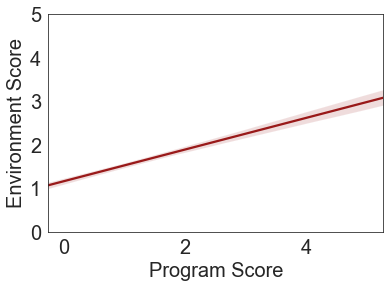

In [25]:
#plt.scatter(result['prog_score'], result['env_score'])
#sns.regplot(result['prog_score'], result['env_score'],color = ('#991919'))
sns.set_style("white")
g = sns.regplot(result['prog_score'], result['env_score'],
                fit_reg=True,
                scatter_kws={"color": "white"},color = ('#991919'))
g.set(ylim=(0, 5))
plt.xlabel("Program Score")
plt.ylabel("Environment Score")


plt.show(g)

In [26]:
slope, intercept, r_value, _, std_err = stats.linregress(result['prog_score'], result['env_score'])

In [27]:
print(slope)
print(intercept)
print(r_value)
print(std_err)

0.3644410173085665
1.1651157346846037
0.4301759235448077
0.021571415325354434


Text(0, 0.5, 'Standard Error')

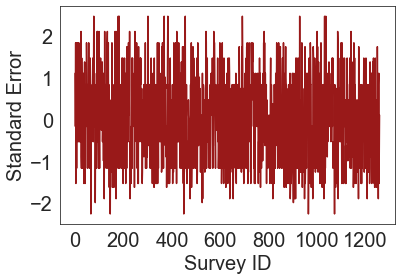

In [33]:
Y_pred = intercept + slope * result['prog_score']
res = result['env_score'] - Y_pred
plt.plot(res,color = ('#991919'))
plt.rcParams.update({'font.size': 10})
plt.xlabel("Survey ID")
plt.ylabel("Standard Error")

In [34]:
RMSE = (sum(res **2)/len(result['prog_score'])) ** .5
RMSE

1.0353510723633415